In [24]:
# Import the necessary parameters to measure/analyse the data

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [25]:
# Load the "Flight Data". This data reveals the short-term visitors entering each state in Australia from 2013 to 2022

flight_data_to_load = os.path.join("visitor_arrivals.csv")
flight_data = pd.read_csv(flight_data_to_load)
flight_data = flight_data.dropna()
flight_data.columns.values.tolist()
flight_data

,Date,"Short-term visitor arrivals, ACT ('000)","Short-term visitor arrivals, NT ('000)","Short-term visitor arrivals, Tas. ('000)","Short-term visitor arrivals, WA ('000)","Short-term visitor arrivals, SA ('000)","Short-term visitor arrivals, Qld ('000)","Short-term visitor arrivals, Vic. ('000)","Short-term visitor arrivals, NSW ('000)"
0,Jan 2013,5.69,4.80,4.76,55.13,15.23,102.45,111.75,188.87
1,Feb 2013,8.17,4.71,7.27,63.90,19.84,128.25,146.41,238.43
2,Mar 2013,5.01,6.22,4.54,65.89,18.75,127.57,139.93,220.95
3,Apr 2013,4.42,9.19,2.71,50.83,13.66,103.84,100.11,176.77
4,May 2013,4.16,6.33,2.34,44.58,10.07,100.58,90.68,154.60
...,...,...,...,...,...,...,...,...,...
116,Sep 2022,5.43,3.86,3.03,41.29,12.02,86.91,90.29,128.98
117,Oct 2022,5.30,2.56,5.22,44.87,14.68,96.97,110.02,150.84
118,Nov 2022,6.91,2.95,7.51,57.00,17.14,99.10,133.52,181.04
119,Oct 2022,5.30,2.56,5.22,44.87,14.68,96.97,110.02,150.84


In [26]:

# Rename the Flight Data to be more presentable in graph format

flight_data = flight_data.rename(columns={'Date' : "Year of Arrival",
 "Short-term visitor arrivals, ACT ('000)":"ACT",
 "Short-term visitor arrivals, NT ('000)" : "NT",
 "Short-term visitor arrivals, Tas. ('000)" : "Tas.",
 "Short-term visitor arrivals, WA ('000)" : "WA",
 "Short-term visitor arrivals, SA ('000)" : "SA",
 "Short-term visitor arrivals, Qld ('000)" : "Qld.",
 "Short-term visitor arrivals, Vic. ('000)" : "Vic.",
 "Short-term visitor arrivals, NSW ('000)" : "NSW"})

flight_data

,Year of Arrival,ACT,NT,Tas.,WA,SA,Qld.,Vic.,NSW
0,Jan 2013,5.69,4.80,4.76,55.13,15.23,102.45,111.75,188.87
1,Feb 2013,8.17,4.71,7.27,63.90,19.84,128.25,146.41,238.43
2,Mar 2013,5.01,6.22,4.54,65.89,18.75,127.57,139.93,220.95
3,Apr 2013,4.42,9.19,2.71,50.83,13.66,103.84,100.11,176.77
4,May 2013,4.16,6.33,2.34,44.58,10.07,100.58,90.68,154.60
...,...,...,...,...,...,...,...,...,...
116,Sep 2022,5.43,3.86,3.03,41.29,12.02,86.91,90.29,128.98
117,Oct 2022,5.30,2.56,5.22,44.87,14.68,96.97,110.02,150.84
118,Nov 2022,6.91,2.95,7.51,57.00,17.14,99.10,133.52,181.04
119,Oct 2022,5.30,2.56,5.22,44.87,14.68,96.97,110.02,150.84


In [44]:
flight_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ACT,NT,Tas.,WA,SA,Qld.,Vic.,NSW
count,121,121,121,121,121,121,121,121
mean,5.64843,5.19157,4.43463,51.5599,15.058,113.699,128.563,194.05
std,3.31901,3.36371,3.37184,28.7803,8.66422,62.4922,74.8808,109.735
min,0.06,0.01,0.01,0.25,0.05,0.6,0.22,0.72
25%,4.22,2.95,2.14,41.29,10.39,86.91,90.68,128.98
50%,5.95,5.44,3.95,59.17,16.83,133.5,139.93,221.4
75%,7.79,7.46,6.16,69.95,20.55,156.16,181.35,269.51
max,14.42,13.62,14.9,111.8,33.3,212.05,299.56,403.74


In [28]:
# Create a new dataframe which contains pre-covid data (this is deemed  BEFORE April 2020)
    	# With the data, determine the monthly increse in visitors to Australia and generate a trendline and correlation coefficient

pre_covid_growth = flight_data.drop(flight_data.index[87:121])
pre_covid_growth_total = pre_covid_growth.sum(1)
pre_covid_pct_change = pre_covid_growth_total.pct_change()

pre_pct_mean = pre_covid_pct_change.mean()
max_visitors = pre_covid_growth_total.mean()

data = [[pre_pct_mean, max_visitors]]

pre_covid_analysis = pd.DataFrame(data, columns = ['Mean Monthly Growth', 'Average Monthly Visitors'])
pre_covid_analysis

,Mean Monthly Growth,Average Monthly Visitors
0,0.013807,671.633103


In [42]:
# Create a new dataframe which contains post-covid data (this is deemed AFTER April 2020)
    	# With the data, determine the monthly increse in visitors to Australia and generate a trendline and correlation coefficient

post_covid_growth = flight_data.drop(flight_data.index[0:87])
post_covid_growth_total = post_covid_growth.sum(1)
post_covid_pct_change = post_covid_growth_total.pct_change()

post_pct_mean = post_covid_pct_change.mean()
max_visitors = post_covid_growth_total.mean()
months_until_mean = 5

data2 = [[post_pct_mean, max_visitors, months_until_mean]]

post_covid_analysis = pd.DataFrame(data2, columns = ['Mean Monthly Growth', 'Mean Monthly Visitors', 'Months Until "Recovery"'])
post_covid_analysis



,Mean Monthly Growth,Mean Monthly Visitors,"Months Until ""Recovery"""
0,0.347443,125.608235,5


In [30]:
# Calculaute pre-covid correlation coefficient

x = range(0,87)
y = pre_covid_growth["WA"]

pre_correlation = st.pearsonr(x, y)
pre_correlation
print(f'The correlation coefficient between the Year of Arrival and Visitors: {round(pre_correlation[0],2)}')

The correlation coefficient between the Year of Arrival and Visitors: 0.38


In [31]:
# Calculate post-covid correlation coefficient

a = range(87,121)
b = post_covid_growth["WA"]

post_correlation = st.pearsonr(a, b)
post_correlation
print(f'The correlation coefficient between the Year of Arrival and Visitors: {round(post_correlation[0],2)}')

The correlation coefficient between the Year of Arrival and Visitors: 0.83


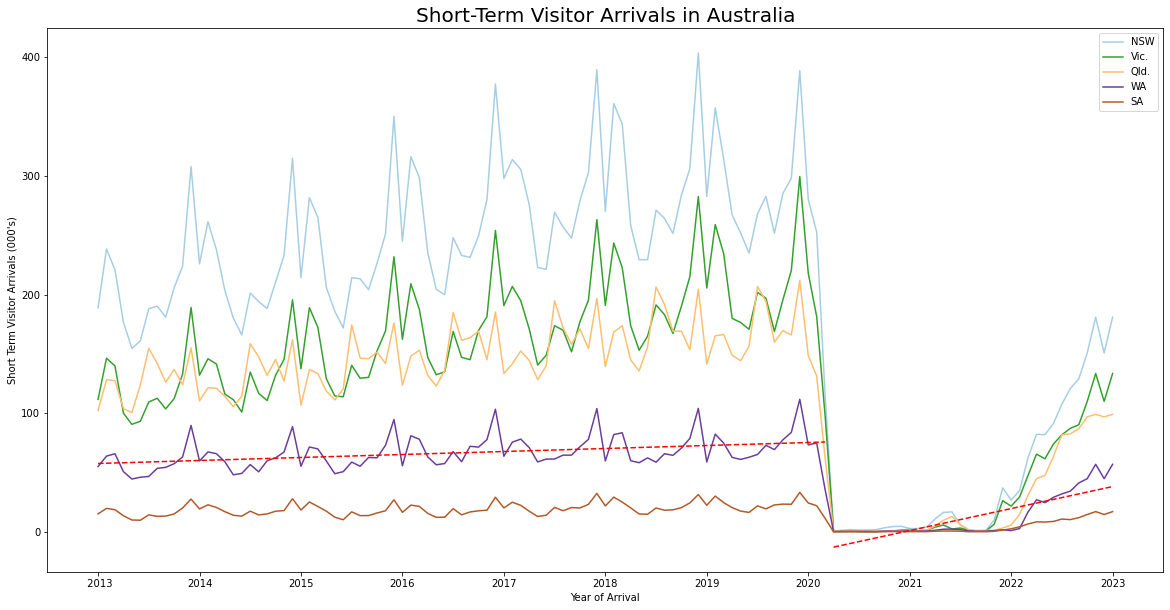

In [38]:
# Plot the trendlines on the Short-Term Visitor Arrivals in Australia graph (following WA's trend)

x = range(0,87)
y = pre_covid_growth["WA"]
z = np.polyfit(x,y,1)
p = np.poly1d(z)

a = range(87,121)
b = post_covid_growth["WA"]
c = np.polyfit(a,b,1)
d = np.poly1d(c)


flight_data.plot.line(x = "Year of Arrival", y = ["NSW", "Vic.", "Qld.", "WA", "SA"], figsize = (20, 10), colormap = "Paired")

plt.title("Short-Term Visitor Arrivals in Australia", fontsize = 20)
plt.xticks(np.arange(0, 121, step = 12), [' 2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
plt.ylabel("Short Term Visitor Arrivals (000's)")
plt.plot(x, p(x), color = 'red', linestyle = 'dashed')
plt.plot(a, d(a), color = 'red', linestyle = 'dashed')

plt.savefig("Short-Term Visitor Arrivals.png")

In [33]:
part_time_jobs_load = os.path.join("part_time.csv")
part_time_jobs = pd.read_csv(part_time_jobs_load)
part_time_jobs = part_time_jobs.dropna()
part_time_jobs = part_time_jobs.rename(columns={'Year' : "Employment Year"})
part_time_jobs


,Employment Year,Male main jobs,Female main jobs,Total tourism part time main jobs
0,2004-05,63.7,143.3,207.0
1,2005-06,61.4,143.3,204.7
2,2006-07,68.0,149.6,217.5
3,2007-08,67.8,144.5,212.3
4,2008-09,70.4,152.2,222.6
5,2009-10,78.6,160.5,239.0
6,2010-11,78.5,154.9,233.4
7,2011-12,80.1,161.4,241.5
8,2012-13,84.7,172.4,257.1
9,2013-14,89.5,171.6,261.0


In [34]:
x = range(0,18)
y = part_time_jobs["Total tourism part time main jobs"]

pre_correlation = st.pearsonr(x, y)
pre_correlation
print(f'The correlation coefficient between the Employment Year and Total Tourism Jobs is {round(pre_correlation[0],2)}')

The correlation coefficient between the Employment Year and Total Tourism Jobs is 0.64


In [43]:
part_time_jobs.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Male main jobs,Female main jobs,Total tourism part time main jobs
count,18,18,18
mean,85.0056,166.511,251.5
std,15.9199,22.482,37.6652
min,61.4,131.5,204.7
25%,72.3,150.25,218.775
50%,82.4,160.95,244.95
75%,97.825,177.2,274.95
max,115.1,210.6,323.6


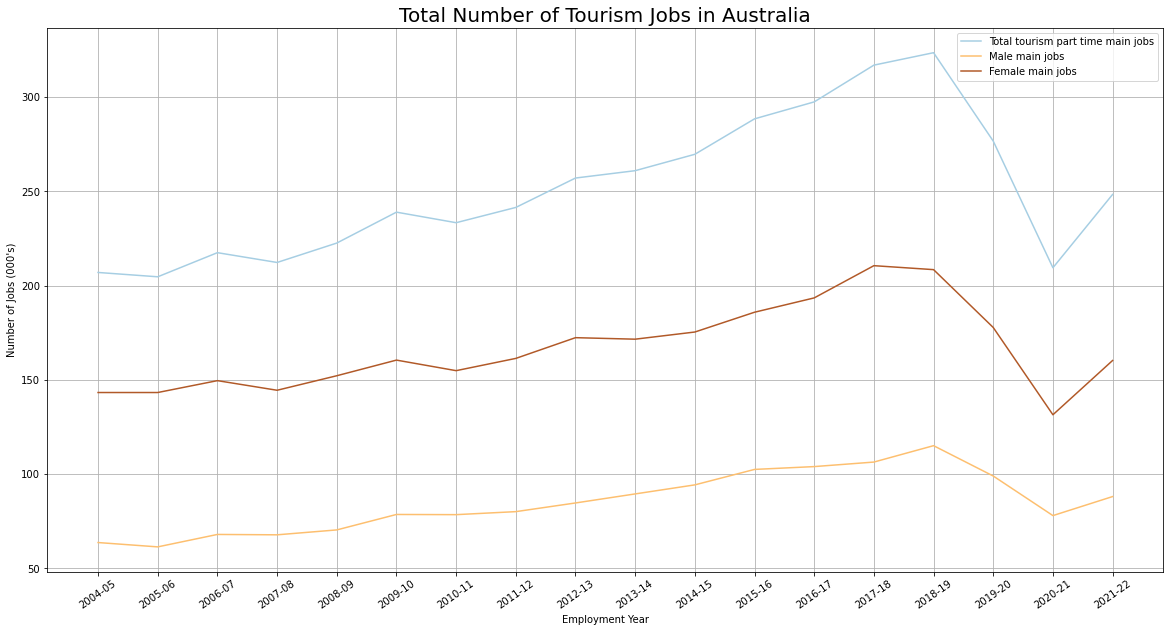

In [39]:
part_time_jobs.plot.line(x = "Employment Year", y = ["Total tourism part time main jobs", "Male main jobs", "Female main jobs"], figsize = (20, 10), colormap = "Paired")

plt.ylabel("Number of Jobs (000's)")
plt.title("Total Number of Tourism Jobs in Australia", fontsize = 20)
plt.xticks(np.arange(0, 18, step = 1), ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18','2018-19', '2019-20', '2020-21', '2021-22'])
plt.xticks(rotation = 35)
plt.grid()

plt.savefig("Total Number of Tourism Jobs in Australia.png")